# **Language Identification**

South Africa is a multicultural society that is characterised by its rich linguistic diversity with 11 official langauges. We are building a machine learning algorithm that could determine the natural language that a piece of text is written in (using texts in South Africa languages for the model building).

# 1. Importing of Packages

In [62]:
# Packages for data analysis
import pandas as pd
import numpy as np


# Packages for visualizations
import seaborn as sns
import matplotlib.style as style

# Packages for preprocessing
import nltk
import string
import re
#from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Packages for training models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
#import xgboost as xgb

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import  classification_report, f1_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

# Style
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')


# 2. Loading of Dataset

In [63]:
# importing the dataset
df = pd.read_csv("C:/Users/thelm/Downloads/languages.csv")
df


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [64]:
df.shape

(33000, 2)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [66]:
lang_id = list(df.lang_id.unique())
print(lang_id)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


## 2.1 General Overview of Dataset

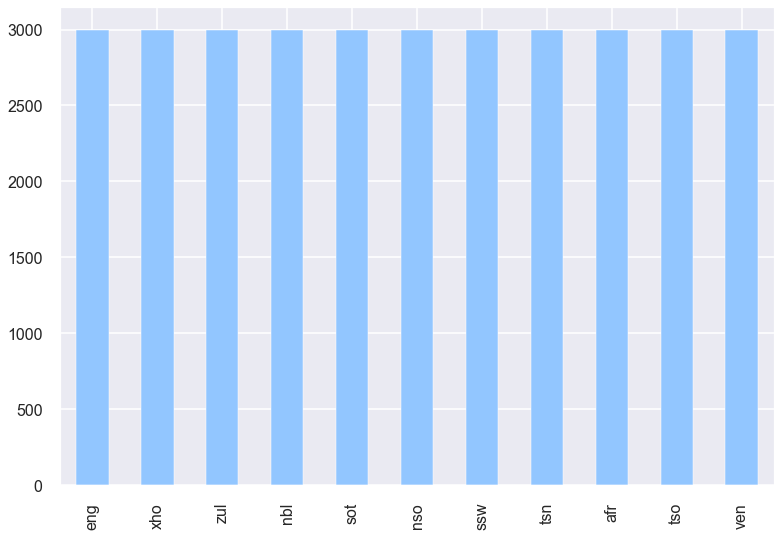

In [69]:
df['lang_id'].value_counts().plot(kind = 'bar')
plt.show()

# 3. Removing noise

In [47]:
df['text'] = df['text'].str.lower()


In [48]:
def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])


In [49]:
df['text'] = df['text'].apply(remove_punctuation)
df['text'].iloc[0]


'umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika'

## 4.1 Splitting out X (indepedent) and Y (target/dependent) variables


In [50]:
X = df['text']
y = df['lang_id']


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
betterVect = CountVectorizer()
X = betterVect.fit_transform(df['text'])


## 4.2 Splitting of Training and Validation Sets


In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10)


# 5. Model Building

In [53]:
mn = MultinomialNB()
mn.fit(X_train, y_train)
pred = mn.predict(X_val)

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred2 = lr.predict(X_val)

kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)
pred3 = kn.predict(X_val)

dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred4 = dt.predict(X_val)


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
#MultinomialNB
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       302
         eng       1.00      1.00      1.00       286
         nbl       1.00      1.00      1.00       294
         nso       1.00      1.00      1.00       308
         sot       1.00      1.00      1.00       273
         ssw       1.00      1.00      1.00       274
         tsn       1.00      1.00      1.00       302
         tso       1.00      1.00      1.00       328
         ven       1.00      1.00      1.00       328
         xho       1.00      1.00      1.00       303
         zul       1.00      1.00      1.00       302

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [55]:
#LogisticRegression
print(classification_report(y_val, pred2))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       302
         eng       1.00      1.00      1.00       286
         nbl       1.00      1.00      1.00       294
         nso       1.00      0.99      1.00       308
         sot       1.00      1.00      1.00       273
         ssw       1.00      1.00      1.00       274
         tsn       0.99      0.99      0.99       302
         tso       1.00      1.00      1.00       328
         ven       1.00      1.00      1.00       328
         xho       0.99      1.00      1.00       303
         zul       1.00      0.99      1.00       302

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [56]:
#KNeighborsClassifier
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

         afr       0.94      1.00      0.97       302
         eng       1.00      0.99      0.99       286
         nbl       0.87      0.85      0.86       294
         nso       0.95      0.92      0.94       308
         sot       0.99      0.96      0.97       273
         ssw       0.92      0.87      0.89       274
         tsn       0.90      0.94      0.92       302
         tso       1.00      0.99      1.00       328
         ven       1.00      0.98      0.99       328
         xho       0.84      0.85      0.85       303
         zul       0.79      0.82      0.81       302

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



In [57]:
#DecisionTreeClassifier
print(classification_report(y_val, pred4))

              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       302
         eng       0.99      0.99      0.99       286
         nbl       0.93      0.86      0.90       294
         nso       0.98      0.97      0.98       308
         sot       0.97      0.98      0.98       273
         ssw       0.88      0.91      0.89       274
         tsn       0.96      0.97      0.96       302
         tso       0.99      0.99      0.99       328
         ven       0.99      0.99      0.99       328
         xho       0.92      0.93      0.92       303
         zul       0.85      0.86      0.86       302

    accuracy                           0.95      3300
   macro avg       0.95      0.95      0.95      3300
weighted avg       0.95      0.95      0.95      3300



## 5.1 Setting up Classifiers for Model Training

In [33]:
import pickle

model_save_path = "tmodel0.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(mn,file)